Step 1 - Load and initial data inspection. Here we check the datatype, statisctical details, null/missing values if any.

In [1]:
import pandas as pd

df = pd.read_csv("Student_Performance.csv")
print('\nFirst 5 rows of the dataset:')
print(df.head().to_markdown(index=False,numalign="left",stralign="left")) #.to_markdown() formats the output nicely.



First 5 rows of the dataset:
| Hours Studied   | Previous Scores   | Extracurricular Activities   | Sleep Hours   | Sample Question Papers Practiced   | Performance Index   |
|:----------------|:------------------|:-----------------------------|:--------------|:-----------------------------------|:--------------------|
| 7               | 99                | Yes                          | 9             | 1                                  | 91                  |
| 4               | 82                | No                           | 4             | 2                                  | 65                  |
| 8               | 51                | Yes                          | 7             | 2                                  | 45                  |
| 5               | 52                | Yes                          | 5             | 2                                  | 36                  |
| 7               | 75                | No                           | 8             | 5      

In [2]:
df.info() #This step is used to get the datatype, no of null values, and total no of columns in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [3]:
df['Extracurricular Activities'].value_counts() #Since this is the only categorical data type, a nominal data type, we're taking the total count

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [4]:
df.describe() #Using this we're getting the descriptive statistical report of the dataset

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Step 2  - Data Preparation - Here we prepare the data by converting categoricald data into numerical data
and get the data ready for prediction by splitting them for training and testing.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df, columns=['Extracurricular Activities'],drop_first = True, dtype = int)
print(df.columns.to_list()) #to see the revised or new column list

#The .dummies function is particulary used to change the categorical data into numerical data & (using drop_first)
# we are eliminating the problem of multicollinearity since we need only one column to represent both states.
#(the base or original dummy column is removed)

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index', 'Extracurricular Activities_Yes']


Now let us create our dependent and independent variables

In [6]:
X = df.drop('Performance Index',axis=1) #Since we're predicting the Performance index columns we're dropiing this and
#not using the same as input. With this our independent variables are defined
y = df['Performance Index'] #This is our target or dependent variable

print(f"Features (X) shape: {X.shape} (Number of rows, Number of features)")
print(f"Target (y) shape: {y.shape} (Number of rows for the target variable)")

Features (X) shape: (10000, 5) (Number of rows, Number of features)
Target (y) shape: (10000,) (Number of rows for the target variable)


Our next step is to split the data for training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

#In this line of code, we're splitting the data i.e the dependent variable y and independent variable X for training and
#testing. The testing size is set to 20 % so, the remaining 80% of the data will be used for training. 
#In a nutshell we're spliting all the columns for training & testing after setting up the target variable Y and 
#Independent variable X.

print(f"Data split into training (80%) and testing (20%) sets.")
print(f"Shape of X_train: {X_train.shape} (Features for training)")
print(f"Shape of X_test: {X_test.shape} (Features for testing)")
print(f"Shape of y_train: {y_train.shape} (Target for training)")
print(f"Shape of y_test: {y_test.shape} (Target for testing)")


Data split into training (80%) and testing (20%) sets.
Shape of X_train: (8000, 5) (Features for training)
Shape of X_test: (2000, 5) (Features for testing)
Shape of y_train: (8000,) (Target for training)
Shape of y_test: (2000,) (Target for testing)


Step 3 - Traininig the MLR model

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

# Step 4 - make prediction and evaluate the model

In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)

print(f"Predictions made for the test set. (First 5 predictions: {y_pred[:5].round(2).tolist()})")

Predictions made for the test set. (First 5 predictions: [54.71, 22.62, 47.9, 31.29, 43.0])


In [11]:
r2 = r2_score(y_pred,y_test)

print(f"R-squared (R2): {r2:.4f}")

R-squared (R2): 0.9887


In [12]:
mae = mean_absolute_error(y_test,y_pred)
print(f"mae: {mae:.4f}")

mae: 1.6111


In [13]:
mse = mean_squared_error(y_test,y_pred)
print(f"mse:{mse:.4f}")

mse:4.0826


In [14]:
#Root mean squared error
rmse = np.sqrt(mse)

print(f"rmse:{rmse:.4f}")

rmse:2.0206


Step 5 - Displaying coefficient and intercept

In [15]:
import pandas as pd

coefficients = model.coef_

intercept = model.intercept_

coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

print("Coefficients:")
print(coefficients_df.to_markdown(index=False, numalign="left", stralign="left"))

print(f"\nIntercept: {intercept:.4f}")

print("\nModel interpretation complete. These values define the linear relationship found by the model.")

Coefficients:
| Feature                          | Coefficient   |
|:---------------------------------|:--------------|
| Hours Studied                    | 2.85248       |
| Previous Scores                  | 1.01699       |
| Sleep Hours                      | 0.476941      |
| Sample Question Papers Practiced | 0.191831      |
| Extracurricular Activities_Yes   | 0.608617      |

Intercept: -33.9219

Model interpretation complete. These values define the linear relationship found by the model.


In [16]:
df.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730,0.003873
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189,0.008369
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106,-0.023284
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268,0.013103
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000,0.024525
Extracurricular Activities_Yes,0.003873,0.008369,-0.023284,0.013103,0.024525,1.000000


In [17]:
df.corr(method="spearman")

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
Hours Studied,1.000000,-0.012476,0.001192,0.017303,0.352395,0.003770
Previous Scores,-0.012476,1.000000,0.005981,0.007881,0.920725,0.008243
Sleep Hours,0.001192,0.005981,1.000000,0.004106,0.045074,-0.023418
Sample Question Papers Practiced,0.017303,0.007881,0.004106,1.000000,0.040492,0.012986
Performance Index,0.352395,0.920725,0.045074,0.040492,1.000000,0.021915
Extracurricular Activities_Yes,0.003770,0.008243,-0.023418,0.012986,0.021915,1.000000


<Axes: >

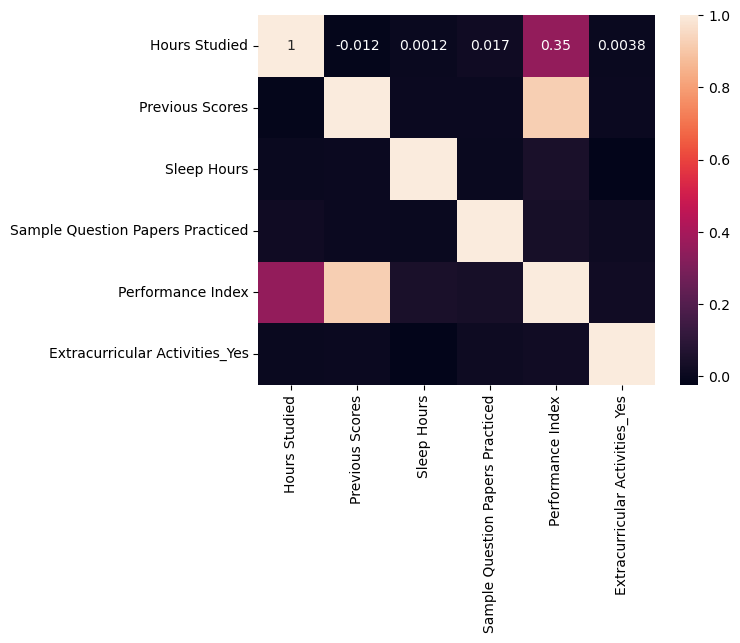

In [28]:
import seaborn as sns

sns.heatmap(df.corr(method='spearman'),annot=True)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

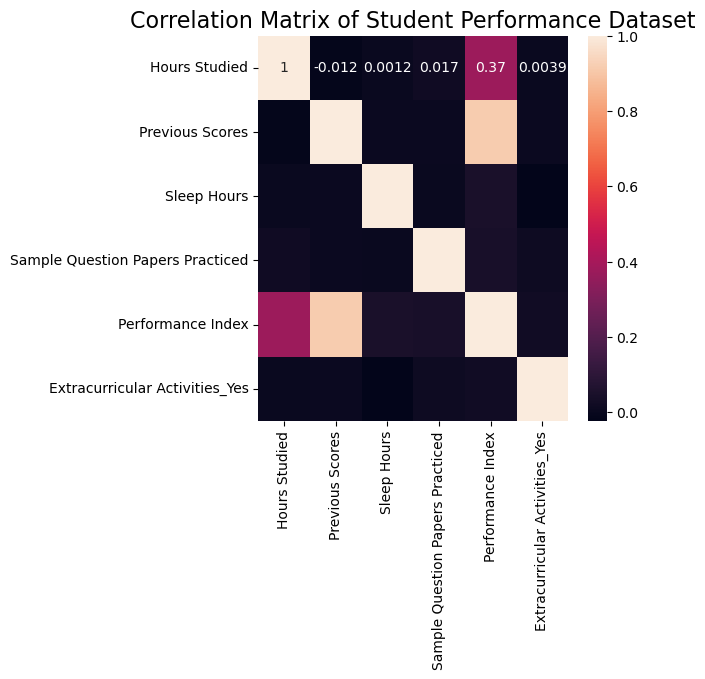

In [23]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize = (5,5))
sns.heatmap(correlation_matrix,annot = True)
plt.title('Correlation Matrix of Student Performance Dataset', fontsize=16)
plt.show()